
# Pregunta 2 (10 puntos)
# Antes de resolver los incisos, se recomienda leer todo el enunciado para identificar apropiadamente los tipos de datos de cada argumento de entrada de su función y evitar arrastre de error.
El coeficiente de correlación de Pearson se calcula de la siguiente manera:
$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{x})^2\right)\left(\sum_{i=1}^{n} (y_i - \bar{y})^2\right)}}$$

Donde $x_i$ e $y_i$ son los términos i-ésimos de los arreglos x e y, respectivamente y $\bar{x} e \bar{y}$ son los valores promedios de los arreglos x e y, respectivamente.

Siendo así, se le pide lo siguiente:

a) (2.0 puntos) Codificar una función en C que calcule el coeficiente de correlación de Pearson. Para ello, considerar que debe recibir como argumentos de entrada dos arreglos de precisión simple, los valores promedios de ambos arreglos y el tamaño del arreglo. Además, se requiere que el valor del coeficiente hallado sea de alta precisión.

In [1]:
%%file libreria_pearson.c

#include<math.h>

double coef_corr_Pearson(float* x, float *y, float X, float Y, int N){
    int i;
    double num=0;
    double den1=0;
    double den2=0;
    for (i=0;i<N;i++){
        num += (double)((x[i]-X)*(y[i]-Y));
        den1 += (double)pow(x[i]-X,2);
        den2 += (double)pow(y[i]-Y,2);
    }
    return num/sqrt(den1*den2);

}

Overwriting libreria_pearson.c


In [2]:
! gcc -fPIC -shared libreria_pearson.c -o libreria_pearson.so

b) (2.0 puntos) Codificar una función en Python que halle el coeficiente de correlación de Pearson. Incluir sus argumentos de entrada y su salida.

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{x})^2\right)\left(\sum_{i=1}^{n} (y_i - \bar{y})^2\right)}}$$


In [3]:
import numpy as np
from math import sqrt
def coef_corr_Pearon(x,y,x_media,y_media,N):
  num = 0
  den1 = 0
  den2 = 0

  for i in range(N):
    num +=  (x[i]-x_media)*(y[i]-y_media)
    den1 += (x[i]-x_media)**2
    den2 += (y[i]-y_media)**2

  return num/sqrt(den1*den2)



c) (2.0 punto) Llamar a la librería de C a través de Ctypes. Considerar que en este inciso se puede descontar puntaje adicional si es que los tipos de dato no han sido correctamente identificados.

In [4]:
import ctypes
lib = ctypes.CDLL('./libreria_pearson.so')
lib.coef_corr_Pearson.argtypes = [    np.ctypeslib.ndpointer(dtype=np.float32),
                                      np.ctypeslib.ndpointer(dtype=np.float32),
                                      ctypes.c_float,
                                      ctypes.c_float,
                                      ctypes.c_int]

lib.coef_corr_Pearson.restype = ctypes.c_double


d) (1.0 punto) Probar sus funciones con 2 arreglos aleatorios de 16 elementos. Usar el resultado de la función numpy.corrcoef(arreglo1,arreglo2) como referencia.

In [5]:
import numpy as np
x = np.array(np.random.rand(16),dtype = np.float32)
y = np.array(np.random.rand(16),dtype = np.float32)
mi_arreglo = np.array([1.0, 2.0, 3.0], dtype=np.float64)
print(lib.coef_corr_Pearson(x,y,np.mean(x),np.mean(y),np.size(x))) #Funcion en C
print(np.corrcoef(x,y))
print(coef_corr_Pearon(x,y,np.mean(x),np.mean(y),np.size(x)))

-0.19874232126004546
[[ 1.         -0.19874232]
 [-0.19874232  1.        ]]
-0.19874232126004546


e) (1.0 punto) Mostrar una gráfica del análisis temporal para un tamaño de elementos igual a 1024. Considerar 25 iteraciones.

In [6]:
import time
from statistics import median
def tomar_mediciones(func, x, y, veces):
    t = []

    for i in range(veces):
        tic = time.perf_counter()
        z = func(x,y,np.mean(x),np.mean(y),np.size(x))
        toc = time.perf_counter()
        t.append(toc-tic)
    return t, median(t)

#PARA NP.CORRCOEF
def tomar_mediciones_np(func, x, y, veces):
    t = []
    for i in range(veces):
        tic = time.perf_counter()
        z = func(x,y)
        toc = time.perf_counter()
        t.append(toc-tic)
    return t, median(t)

In [7]:
tiempo_c= tomar_mediciones(lib.coef_corr_Pearson,x,y,25)
tiempo_py= tomar_mediciones(coef_corr_Pearon,x,y,25)
tiempo_np= tomar_mediciones_np(np.corrcoef,x,y,25)

In [8]:
import matplotlib.pyplot as plt
def graficar(x, y, mediana, etiqueta):
    plt.plot(x, y, label=etiqueta)
    plt.plot(x, [mediana] * len(y), label=f'Mediana de {etiqueta}')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Mediciones')
    plt.xlabel('Tiempo')
    plt.show()

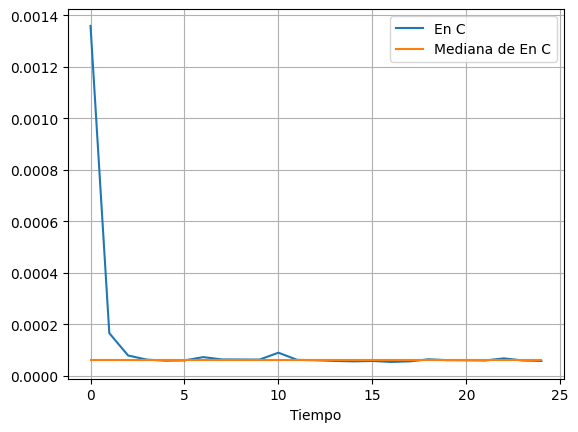

In [9]:
graficar(range(len(tiempo_c[0])), tiempo_c[0], tiempo_c[1], 'En C')

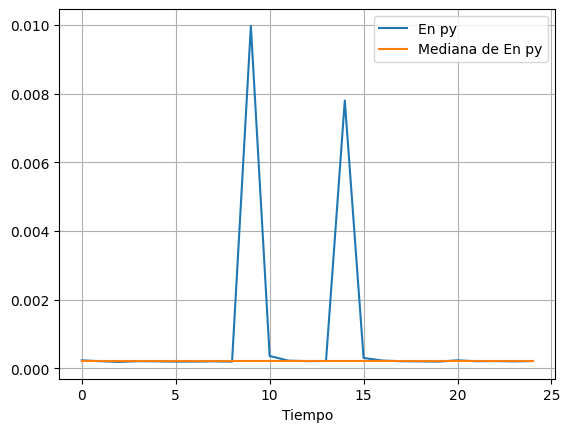

In [10]:
graficar(range(len(tiempo_py[0])), tiempo_py[0], tiempo_py[1], 'En py')

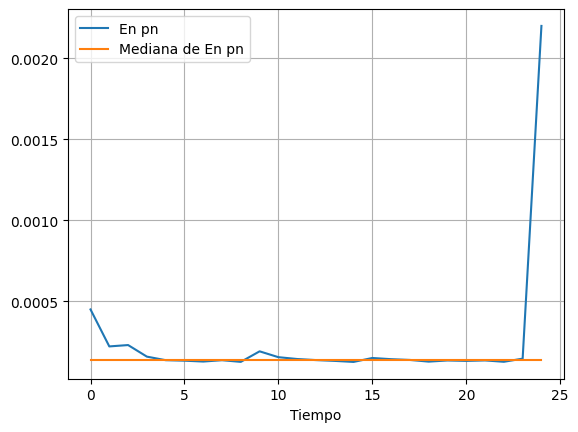

In [11]:
graficar(range(len(tiempo_np[0])), tiempo_np[0], tiempo_np[1], 'En pn')

f) (1.0 punto) Mostrar una gráfica del SpeedUP para valores de N que van desde $2^{10}$ hasta $2^{16}$. No olvidar las iteraciones y el cálculo de la mediana para tomar el tiempo representativo para cada N.

In [20]:
import time
from statistics import median
def tomar_mediciones(func, x, y, veces):
    t = []

    for i in range(veces):
        tic = time.perf_counter()
        z = func(x,y,np.mean(x),np.mean(y),np.size(x))
        toc = time.perf_counter()
        t.append(toc-tic)
    return t

#PARA NP.CORRCOEF
def tomar_mediciones_np(func, x, y, veces):
    t = []
    for i in range(veces):
        tic = time.perf_counter()
        z = func(x,y)
        toc = time.perf_counter()
        t.append(toc-tic)
    return t

In [21]:
ns = [2**i for i in range(10, 16)]
fun_c = []
fun_py = []
fun_np = []
x = np.array(np.random.rand(16),dtype = np.float32)
y = np.array(np.random.rand(16),dtype = np.float32)
for N in ns:
    tiempo_c= np.mean(tomar_mediciones(lib.coef_corr_Pearson,x,y,N))
    tiempo_py= np.mean(tomar_mediciones(coef_corr_Pearon,x,y,N))
    tiempo_np= np.mean(tomar_mediciones_np(np.corrcoef,x,y,N))

    fun_c.append(tiempo_c[1])
    fun_py.append(tiempo_py[1])
    fun_np.append(tiempo_np[1])
plt.plot(ns, numpy.asarray(fun_c) / numpy.asarray(fun_np), label='C / np.coe_Pearson')
plt.plot(ns, numpy.asarray(lf1) / numpy.asarray(fun_np), label='Python / np.coe_Pearson')

plt.legend()
plt.xlabel('N')
plt.ylabel('Speedup')
plt.grid(True)
plt.show()

IndexError: ignored

g) (1.0 punto) Realizar comentarios acerca de sus experiencias. Incluir específicamente sus conclusiones en las diferencias de implementación de C y Python.

Respuesta: Deacuerdo con la implementación de las funciones C y Python, se puede apreciar que la función C es mucho más rapida que las funciones en Python porque la media en el tiempo de ejecución es menor. Cuando se realiza 25 iteraciónes el tiempo de ejecución de la funcion C, python y python usando la funcion numpy.corrcoef(arreglo1,arreglo2) son 0.1 ms, 1 y 0.1 ms.
Esta respuesta es correcta parcialmente, porque para hacer un analisis más riguroso se debe hacer más iteraciónes. Algo fallo :c **texto en negrita**
